# Predicting heart disease using Machine Learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes


We're going to take the following approach :
1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modeling 
6. Experimentation

## 1. Problem Definition 
In a Statement, 
> Given Clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

The Original data came from the Cleavland data from the UCI Machine learning Repository 

there are also a version of it available on Kaggle

## 3. Evaluation

> If we can reach 95% Accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

**Create Data dictionary**

* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)

* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target: the predicted attribute



## Prepareing the tools

we're going to use numpy, pandas, matplotlib for data analysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# models form sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score 

## Load Data

In [3]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (Exploratory data anaylsis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with

1. What Question(s) are you trying to solve ?
2. what kind of data we have and how do we treat different types ?
3. what's missing from the data and how do you deal with it ?
4. Where are the outlieres and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Lets find out how many of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

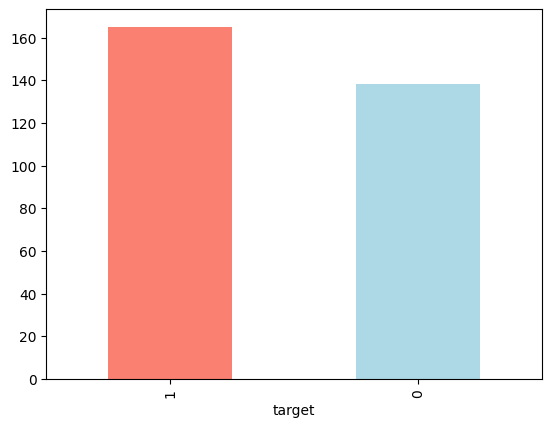

In [7]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency accourding to sesx  

In [11]:
df.sex.value_counts() # male is 1 : female is 0

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# compare target column with the sex column 
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

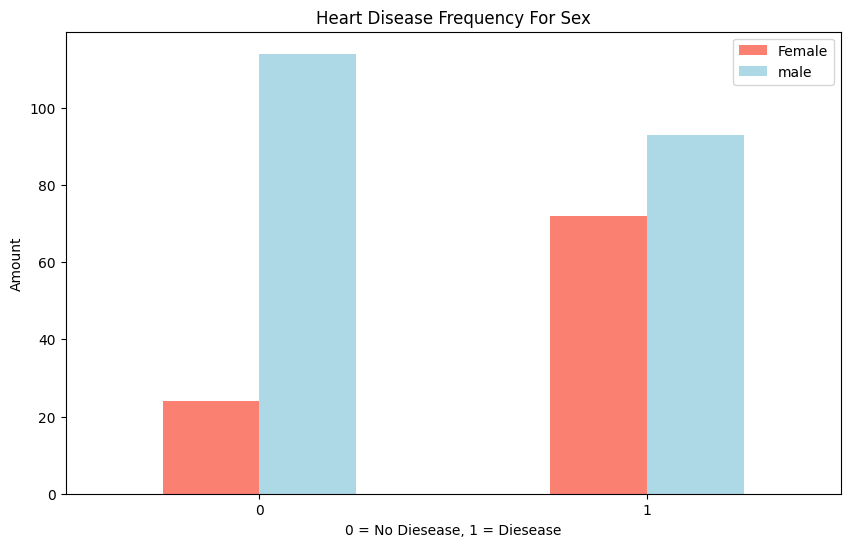

In [13]:
# Create a plot of cross-tab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel('0 = No Diesease, 1 = Diesease')
plt.ylabel('Amount')
plt.legend(['Female','male'])
plt.xticks(rotation=0)

### Age vs. Max Heart Rate for Heart Diesease 

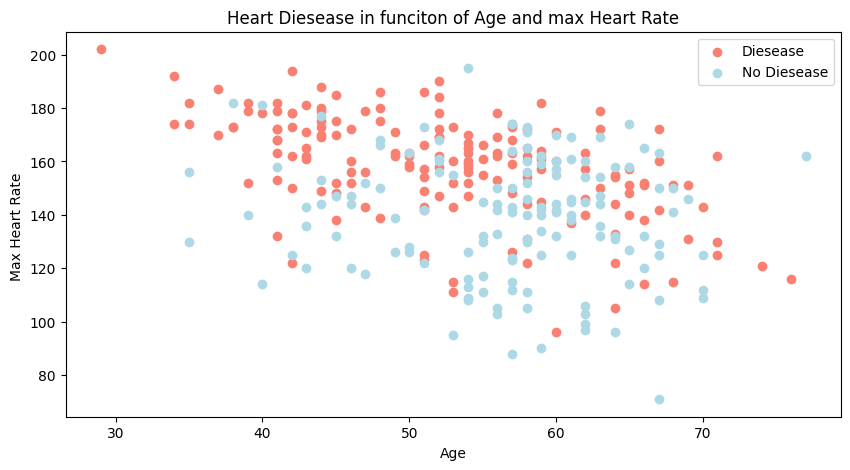

In [14]:
# create anthore figure 
plt.figure(figsize=(10,5))

# scatter with positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c='salmon'
            )

## Scatter with negative Examples

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue'
            )

# Add some helpful info
plt.title("Heart Diesease in funciton of Age and max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate ")
plt.legend(["Diesease","No Diesease"]);

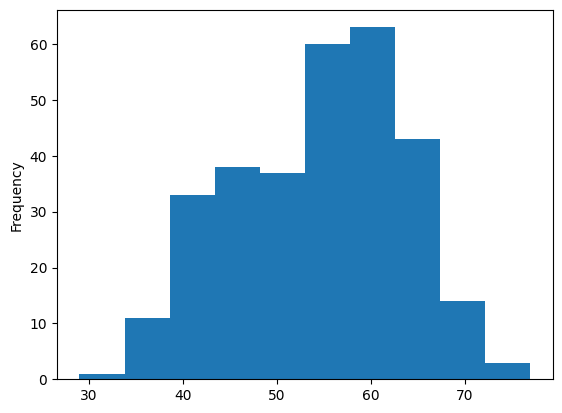

In [15]:
#  Check The distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequecny per chest pain type 

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


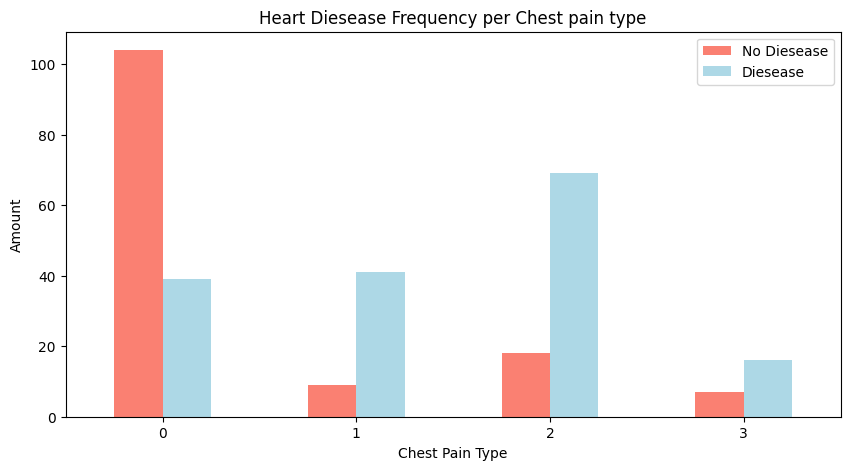

In [17]:
# make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,5),
                                  color=['salmon','lightblue'])

plt.title('Heart Diesease Frequency per Chest pain type')
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Diesease", "Diesease"])
plt.xticks(rotation=0);


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


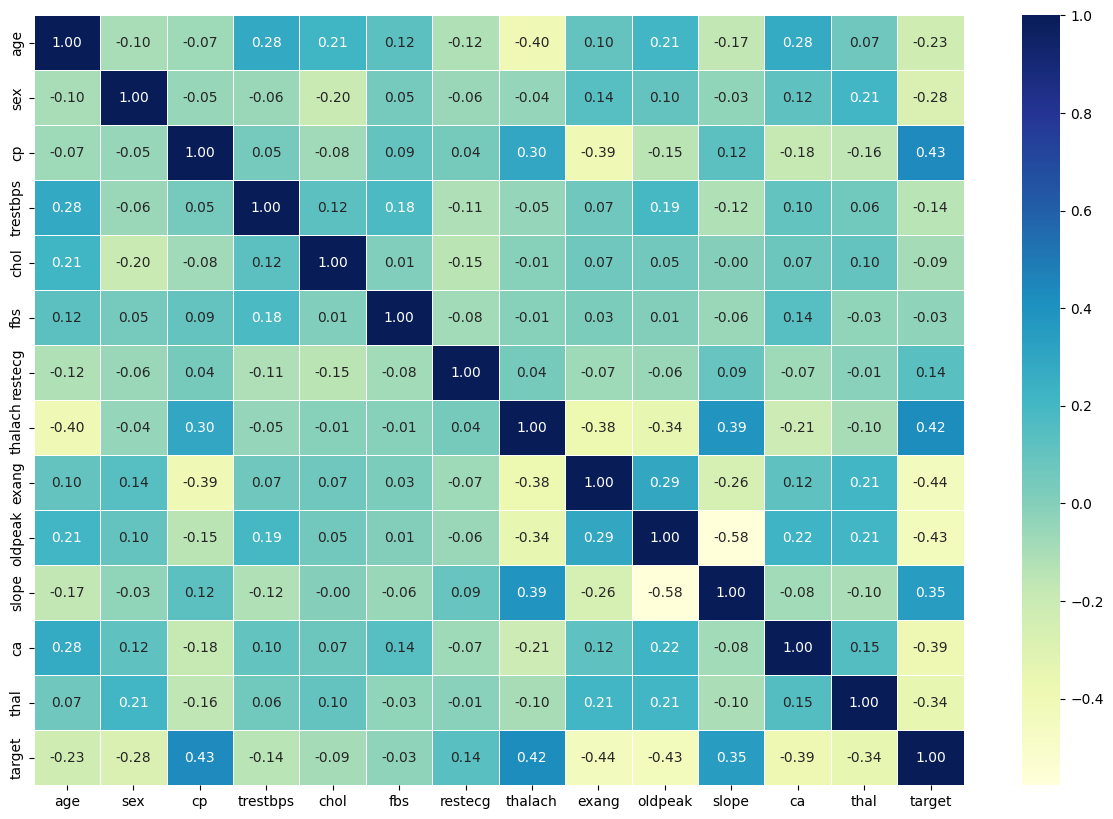

In [20]:
# let's make our correlation matrix a little prettier

corr_mattix= df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mattix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

## Modeling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# split data int x ,y 

x= df.drop('target',axis=1)
y=df['target']

x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# split data into train and test set

np.random.seed(42)
x_train, X_test, Y_train, Y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)




In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we've got our data split into training and test sets, it's time to build a machine learning model 

we'll train it (find the patterns) on the training set .

And we'll test it (use the patterns) on the test set.

we're going to try 3 differnet machine learning models :
1. Logistic Regression 
2. K-Nearset Neighbours Classifier
3. Random Forest Classifier

In [26]:
# put model in a dictionary

models= {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}

# Create a function to fit and score model

def fit_and_score(models,x_train,X_test,Y_train,Y_test):
    
    """
    Fits and evaluate given machine learning models 
    model: a dic of sklearn ml models
    X_train : training data (no labels)
    x_test: testing data
    Y_train: training labels
    Y_test: test Labels
    
    """
    # set ranom seed
    np.random.seed(42)
    # make a dic to keep model scors
    model_scores={

    }
    for name,model in models.items():
        # fit the model
        model.fit(x_train,Y_train)
        # evaluate a model
        model_scores[name]=model.score(X_test,Y_test)

    return model_scores

In [29]:
models_score = fit_and_score(models,x_train,X_test,Y_train,Y_test)
models_score

f:\Project\AI\heart-disease-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

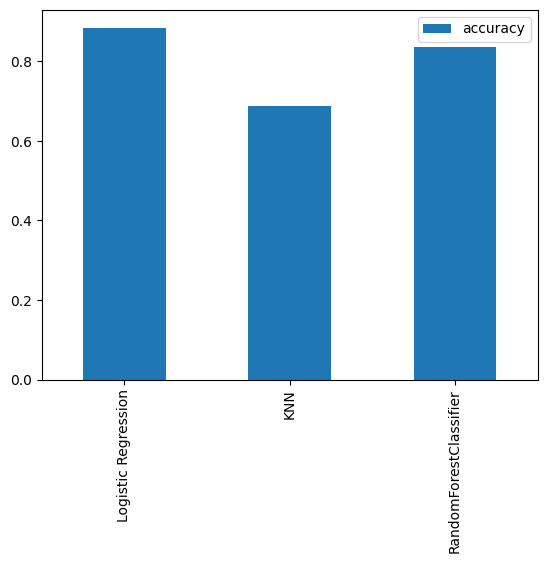

In [33]:
model_compare =pd.DataFrame(models_score,index=['accuracy'])
model_compare.T.plot.bar();

we've got a baseline model .. and we know a model's first predictions aren't always what we should based our next steps off. what should do?

Let's look at the following :

* Hyperparameter tunning 
* Feature Importance
* Confusion matrix
* cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* Area Under Curve (AUC)


### Hyperparameter Tunning (BY hand)

In [40]:
# Let's tune KNN
train_scores= []
test_scores= []

# create a list of different values for n_neighbours
neighbors= range(1,21)

# setup KNN instance
knn= KNeighborsClassifier()

# Loops through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the alogorithm
    knn.fit(x_train,Y_train)

    # Update training score list
    train_scores.append(knn.score(x_train,Y_train))
    # update test score list
    test_scores.append(knn.score(X_test,Y_test))



In [41]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

MAX KNN score on the test data 75.41


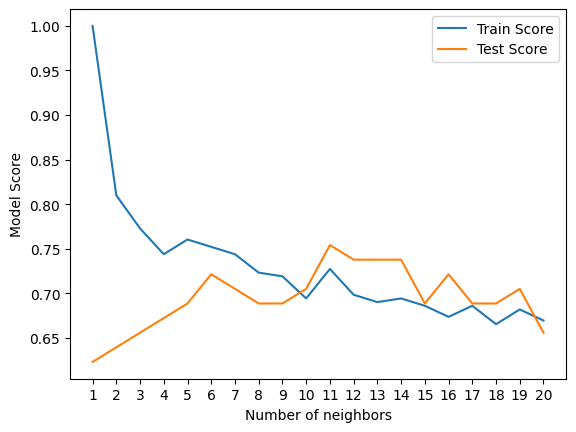

In [43]:
plt.plot(neighbors, train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel('Model Score')
plt.legend()

print(f"MAX KNN score on the test data {max(test_scores)*100:.2f}")

### Hyperparameter tunning with RandomizedSearchCV

We're going to tune :
* LogisticRegression()
* RandomForestClassifier()

In [53]:
# create a hyperparameter for logisticRegression
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":['liblinear']
    }

# Create a hyperparameter for RandomForsetClassifer
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
    }   

Now we've got hyperparameter grids setup for each of our models,

Let's tune them with `RandomizedSearchCV`

In [54]:
# Tune Logisitic Regression

np.random.seed(42)

# setup random Hyperparameters search for logistic Regression
rs_log_reg=RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# Fit random hyperparameter Search model for logisitic regression

rs_log_reg.fit(x_train,Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [55]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [56]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

Now let's try RandomForestClassifer

In [57]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [58]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [59]:
rs_rf.score(X_test,Y_test) # we get a little improvement

0.8688524590163934

In [60]:
models_score # our logistic still the better one

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Hyperparameter tunning with GridSearchCV

Since our LogisticRegression model provides the best score so far,

we'll try and imporve them again with `GridSearchCV`

In [65]:
# differnet hypereperameter for our logisitcRegreesion
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":["liblinear"],
}

gs_log_reg= GridSearchCV(LogisticRegression(),log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train,Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [68]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Evaluate our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision 
* Recall 
* F1 Score



To Make comparisions and evaluate our trained model, first we need to make predictions

In [69]:
# Make prediction with tuned model

y_preds= gs_log_reg.predict(X_test)

In [70]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

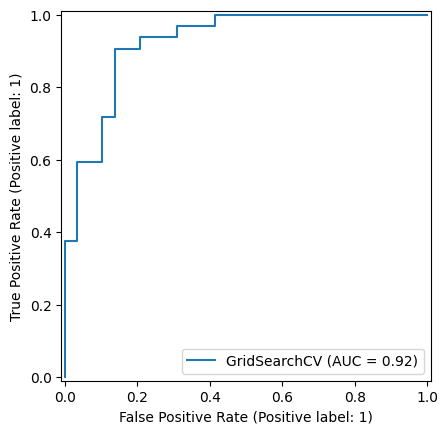

In [77]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg,X_test,Y_test);

In [78]:
# Confusion matrix
confusion_matrix(Y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

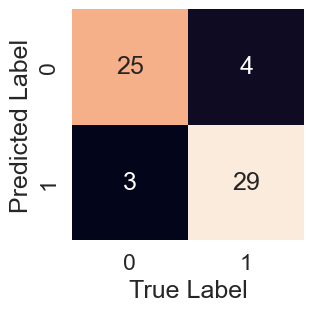

In [85]:
sns.set_theme(font_scale=1.5)

def plot_conf_max(ytest,ypreds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax  =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ytest,ypreds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_max(Y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision,recall and F1 score

In [86]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evalutioon metrics using cross-validaiton

we're going to calculate precision, recall and f1 score of our model using cross-validation and to do so we'll using `cross-val-score()`

In [88]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [92]:
# create a new classifer with best parameteres
clf= LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [93]:
# cross-validated accuracy 
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [95]:
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [100]:
# cross-validated Prescision 
cv_precision= cross_val_score(clf,x,y,cv=5, scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [101]:
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [103]:
# cross-validated Recall 
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [107]:
# cross-validated F1-score 
cv_f1= cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

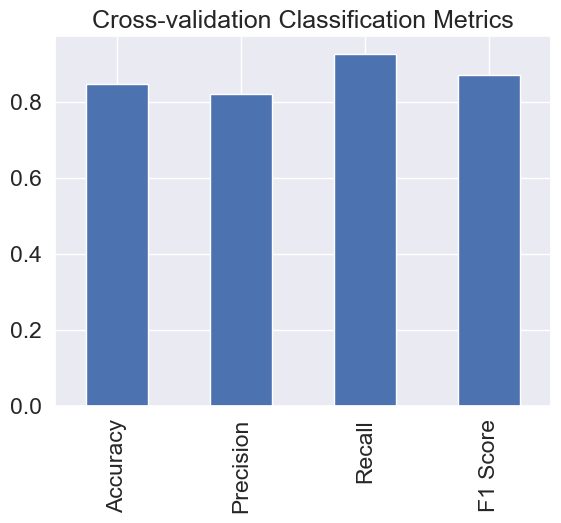

In [115]:
# Visualize our cross-validated metrics
cv_metrics= pd.DataFrame({
            "Accuracy":cv_acc,
            "Precision":cv_precision,
            "Recall":cv_recall,
            "F1 Score":cv_f1}
            ,index=[0])
cv_metrics.T.plot.bar(title="Cross-validation Classification Metrics",legend=False);

### Feature Importance

Feature Importance is another way as asking ,"Which features contributed most to outcomes of the model and how did they contributed?"

*Finding feature importance is different for each machine learning model*

One way to find feature importance is to search for (MODEL NAME ) Feature importance

In [119]:
clf= LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(x_train,Y_train);

In [122]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [126]:
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076873709286024),
 'sex': np.float64(-0.8606204735539111),
 'cp': np.float64(0.6600143086174385),
 'trestbps': np.float64(-0.01155970641957489),
 'chol': np.float64(-0.0016649609500147373),
 'fbs': np.float64(0.04017238940156104),
 'restecg': np.float64(0.3160340177157746),
 'thalach': np.float64(0.02458922261936637),
 'exang': np.float64(-0.6047017032281077),
 'oldpeak': np.float64(-0.567954572983317),
 'slope': np.float64(0.4508539117301764),
 'ca': np.float64(-0.6373332602422034),
 'thal': np.float64(-0.6755508982355707)}

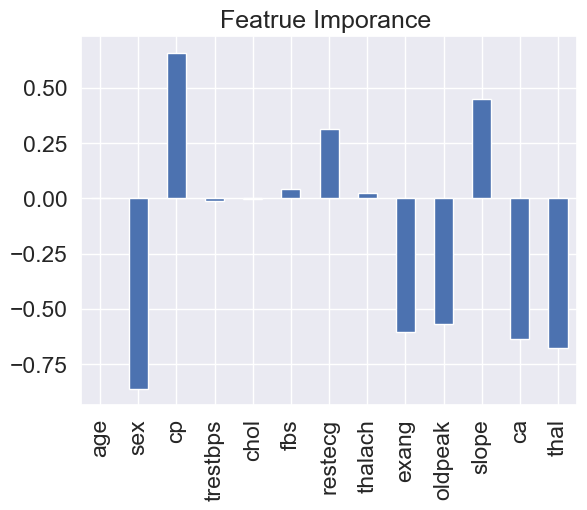

In [129]:
# Visualize Feature Importance
feature_df=  pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(title="Featrue Imporance ",legend=False);